# Task #5

# Graduate Rotational Internship Program @The Sparks Foundation

# Exploratory Data Analysis - Sports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
sf = pd.read_csv('matches.csv',index_col='id',parse_dates=['date'])
sf.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
sf.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [4]:
sf['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [5]:
sf[sf[('result')] == 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
11342,2019,Mumbai,2019-02-05,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [6]:
sf[sf[('result')] == 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [7]:
sf['winner'].isnull().sum()

4

In [8]:
winlost= sf[['team1','team2','winner']]
winlost.head()

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [9]:
winlost['loose'] = winlost.apply(lambda x: (x['team1'] if x['team2'] == x['winner'] else x['team2']),axis =1)

In [10]:
winlost.head()

,team1,team2,winner,loose
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [11]:
winn = winlost['winner'].value_counts()
loosers = winlost['loose'].value_counts()

In [12]:
winn.iplot(kind = 'bar', xTitle = 'Team', yTitle = 'count', title = 'winning count')

In [13]:
loosers.iplot(kind = 'bar', xTitle = 'Team', yTitle = 'count', title = 'loosers count')

In [14]:
sf.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [15]:
mom =sf['player_of_match'].value_counts()
mom

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
AC Voges           1
RS Bopara          1
K Rabada           1
JD Ryder           1
DL Chahar          1
Name: player_of_match, Length: 226, dtype: int64

In [16]:
mom[:20].iplot(kind ='bar',xTitle='count',title = 'Top 20 Most man Of Match')

## MATCHES HOSTED IN EACH CITY

In [17]:
city = sf['city'].value_counts()

In [18]:
city[:20].iplot(kind ='bar')

## MATCHES HOSTED AT VANUE

In [19]:
stadium = sf['venue'].value_counts()
stadium[:20].iplot(kind ='bar')

## Mumbai Indians vs Chennai Super Kings Head to Head

In [20]:
def get_micsk(team1,team2):
    teams = ['Chennai Super Kings','Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [21]:
index =[]
for row in sf.iterrows():
    flag = get_micsk(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [22]:
sum(index)

28

In [23]:
micsk = sf[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [24]:
micsk['toss_decision'].value_counts().iplot(kind ='bar')

In [25]:
micsk['toss_winner'].value_counts().iplot(kind ='bar')

In [26]:
micsk['toss_winner'].value_counts().iplot(kind ='bar')

In [27]:
micsk['player_of_match'].value_counts().iplot(kind ='bar')

In [28]:
 micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [29]:
temp = micsk[['winner','win_by_runs','win_by_wickets']]
temp = temp.set_index('winner')
temp.max()

win_by_runs       60
win_by_wickets     9
dtype: int64

<AxesSubplot:xlabel='winner'>

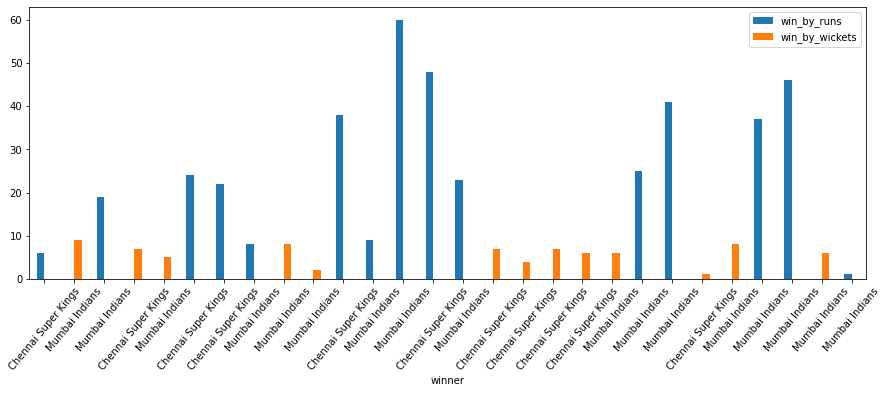

In [30]:
temp.plot.bar(figsize =(15,5),rot =50)

## Match Summary: Season wise

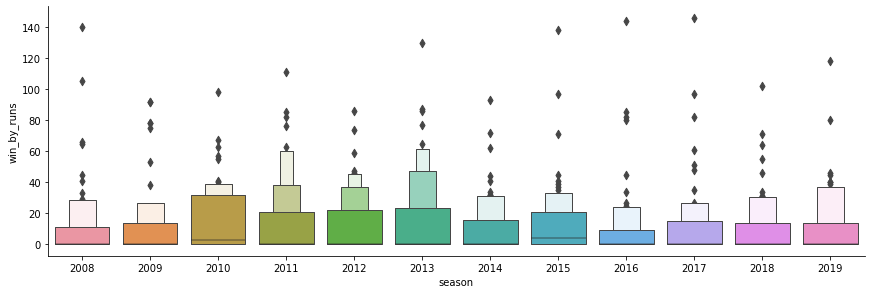

In [31]:
sns.catplot( x ='season', y = 'win_by_runs',data =sf,
            kind ='boxen',height=4,aspect=3)

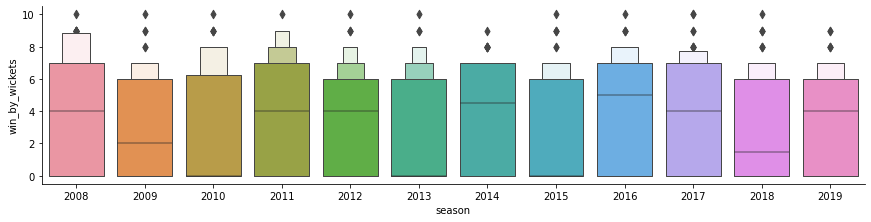

In [32]:
sns.catplot( x ='season', y = 'win_by_wickets', kind ='boxen',data =sf,height=3,aspect=4)

In [33]:
season = sf.groupby('season')[['win_by_runs']].max()

In [34]:
season

,win_by_runs
season,
2008,140
2009,92
2010,98
2011,111
2012,86
2013,130
2014,93
2015,138
2016,144


In [35]:
season.iplot(kind = 'bar')

## Ball By Ball Analysis

In [36]:
sf = pd.read_csv('deliveries.csv',index_col='match_id')
sf.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [37]:
sf['batsman'].value_counts()[:20].iplot(kind= 'bar')

In [38]:
sf['bowler'].value_counts()[:20].iplot(kind= 'bar')

In [39]:
sf['non_striker'].value_counts()[:20].iplot(kind= 'bar')

In [40]:
sf.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [41]:
runs = sf.groupby('batting_team').sum()[['batsman_runs','total_runs']]

In [42]:
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


In [43]:
runs.iplot(kind = 'bar')

In [44]:
batsman = sf.groupby('batsman')['batsman_runs'].sum()
batsman = batsman.sort_values(ascending = False)

In [45]:
batsman

batsman
V Kohli         5434
SK Raina        5415
RG Sharma       4914
DA Warner       4741
S Dhawan        4632
                ... 
J Denly            0
C Nanda            0
RR Bhatkal         0
K Ahmed            0
Abdur Razzak       0
Name: batsman_runs, Length: 516, dtype: int64

In [46]:
batsman[:20].iplot(kind = 'bar')

In [47]:
sf['player_dismissed'].value_counts()[:20].iplot(kind = 'bar')

In [48]:
sf['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [49]:
sf['dismissal_kind'].value_counts().iplot(kind = 'bar')